Link al repositorio de GitHub: https://github.com/alejandrojimenezvalero/eolic_energy_prediction_sk_learn

# Pedicciones para valores altos y bajos de energía

En este notebook se evalua, por una parte, si el modelo final escogido predice de una manera más precisa los valores altos de la variable energía de los valores bajos, y por otra parte, se transforma el problema de regresión en uno de clasificación y se evalua un modelo de clasificación para la variable energía en función de si esta es 'alta' o 'baja'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# En este caso cargamos el fichero limpio
cleaned_wind_ava = pd.read_csv('./cleaned_wind_ava.csv')
# Hacemos índice la columna datetime
cleaned_wind_ava.set_index('datetime', inplace=True)

Para probar primero si el mejor modelo predice mejor lod valores altos que los bajos debemos dividir
los datos en dos conjuntos, uno con los valores altos de energía (por encima del tercer cuartil de los datos)
y otro con los valores bajos de energía (por debajo del tercer cuartil de los datos


In [7]:
# Definir los cuartiles
q3 = cleaned_wind_ava['energy'].quantile(0.75)

# Crear dos datasets separados para valores bajos y altos de energía
cleaned_wind_ava_low_energy = cleaned_wind_ava[cleaned_wind_ava['energy'] <= q3]
cleaned_wind_ava_high_energy = cleaned_wind_ava[cleaned_wind_ava['energy'] > q3]

In [8]:
cleaned_wind_ava_low_energy.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,3544.000000,3.544000e+03,3544.000000,3544.000000,3.544000e+03,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,...,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,358.619503,2.494643e+06,15.927580,33.367175,1.365051e+06,2.856014,2.588361,-0.040038,-0.374440,97887.293435,...,286.108373,287.178354,287.051739,0.009246,-0.020070,286.775348,0.412783,-5.915981,-0.211620,-0.412716
std,311.129785,4.454725e+04,6.546087,136.636786,1.131065e+06,0.397809,0.116608,2.447405,2.500074,654.915685,...,6.533480,5.767151,4.696831,0.232349,0.256811,3.568674,0.007006,0.086474,3.850076,3.913352
min,0.010000,2.360347e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-6.050706,-8.174159,94448.853443,...,268.970603,275.461648,278.389271,-0.758831,-1.280752,280.875389,0.364805,-6.126757,-8.679070,-11.423468
25%,92.915000,2.463582e+06,11.039644,0.000000,5.774733e+05,2.452881,2.469697,-1.755846,-2.136624,97545.972014,...,281.395839,282.425812,282.817292,-0.110104,-0.148598,283.434526,0.410024,-5.975438,-3.566918,-3.316064
50%,272.220000,2.497951e+06,15.438765,0.568386,1.039506e+06,2.871066,2.588631,-0.284796,-0.424975,97906.684678,...,285.924732,287.313330,286.742054,-0.008374,-0.017537,286.851586,0.410603,-5.949631,-0.495494,-0.928496
75%,592.422500,2.529741e+06,20.107368,11.860313,1.818943e+06,3.231374,2.697721,1.693239,1.119177,98265.621526,...,290.710249,292.091237,291.375582,0.126247,0.075435,290.159885,0.414196,-5.887245,3.041253,2.274178
max,1077.880000,2.579163e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.318661,8.807082,99917.733093,...,305.000640,299.556292,295.639998,2.542981,1.411931,292.808658,0.428907,-5.618172,18.052846,12.394340


In [9]:
cleaned_wind_ava_high_energy.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,1182.000000,1.182000e+03,1182.000000,1182.000000,1.182000e+03,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,1660.267242,2.474586e+06,16.284448,24.708232,2.701859e+06,2.696798,2.541235,1.639479,1.584053,97627.367721,...,284.480920,285.178518,285.544089,0.264702,0.256467,286.340733,0.416327,-5.886188,2.388004,2.521568
std,385.905636,4.209738e+04,6.578599,58.806771,1.830229e+06,0.371714,0.108596,4.244890,3.809054,831.968042,...,4.729466,4.535514,4.043571,0.565309,0.557060,3.495736,0.008622,0.111899,6.585579,5.841763
min,1079.650000,2.358748e+06,2.404345,0.000000,1.332506e+05,2.323973,2.425866,-8.619823,-8.240219,93770.364813,...,270.547365,275.669274,278.419696,-1.714897,-1.438829,280.878094,0.368735,-6.130465,-11.879053,-11.621539
25%,1338.692500,2.445825e+06,11.742060,0.075785,1.265533e+06,2.383072,2.451150,-2.722869,-1.727922,97128.338099,...,281.545355,281.914673,282.488632,-0.228610,-0.144680,283.370341,0.410166,-5.987322,-5.283437,-2.993265
50%,1609.925000,2.472197e+06,15.888298,3.391367,2.379826e+06,2.531654,2.498534,2.911259,1.942580,97697.772588,...,284.595705,284.438274,284.855148,0.351814,0.206495,285.836992,0.413713,-5.929340,5.026660,3.411834
75%,1957.455000,2.502830e+06,20.713408,22.744897,3.708959e+06,3.059850,2.644992,5.108777,4.712840,98172.422887,...,287.391908,288.115319,288.486239,0.659236,0.604191,289.775693,0.424350,-5.769039,7.763412,7.342553
max,2502.350000,2.580387e+06,36.186044,966.255530,1.108063e+07,3.449699,2.762735,12.974802,11.699814,99764.378681,...,299.200137,297.052410,294.515378,2.842552,2.366522,292.808079,0.428914,-5.642137,18.964137,16.913033


In [10]:
# Estudiemos como queda cada fichero
print("(Filas, columnas) del fichero con valores altos de energía", cleaned_wind_ava_high_energy.shape)
print("(Filas, columnas) del fichero con valores bajos de energía", cleaned_wind_ava_low_energy.shape)

(Filas, columnas) del fichero con valores altos de energía (1182, 23)
(Filas, columnas) del fichero con valores bajos de energía (3544, 23)


In [11]:
# Aplicamos la misma lógica que cuando teníamos el conjunto de datos completo
years = pd.to_datetime(cleaned_wind_ava_high_energy.index).year
print("Cantidad de fechas del año 2009 en el fichero con valores altos de energía:", (years == 2009).sum())
years = pd.to_datetime(cleaned_wind_ava_low_energy.index).year
print("Cantidad de fechas del año 2009 en el fichero con valores bajos de energia:", (years == 2009).sum())

Cantidad de fechas del año 2009 en el fichero con valores altos de energía: 216
Cantidad de fechas del año 2009 en el fichero con valores bajos de energia: 696


La cantidad de datos del 2009 en relación a datos totales para ambos ficheros es del 20%, lo cual coincide con lo que ocurría con el fichero que contenía todos los datos, por tanto este criterio para hacer el split outer en los conjuntos de train y test puede asemejarse a cuando se ha realizado la partición del dataset con todas las instancias disponibles.

In [12]:
# Dividir los datasets en características (X) y variable objetivo (y) para ambos conjuntos de datos
X_low, y_low = cleaned_wind_ava_low_energy.drop(['energy'], axis=1), cleaned_wind_ava_low_energy['energy']
X_high, y_high = cleaned_wind_ava_high_energy.drop(['energy'], axis=1), cleaned_wind_ava_high_energy['energy']

In [13]:
# Importamos las librerías necesarias para dividir el conjunto de datos
from sklearn.model_selection import train_test_split
# Dividimos cada dataset en train y test 
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=696, shuffle=False)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=216, shuffle=False)

In [14]:
from sklearn.preprocessing import StandardScaler
# Definimos el método de escalado
scaler = StandardScaler()
# Escalamos los datos
X_low_train_scaled = scaler.fit_transform(X_low_train)
X_high_train_scaled  = scaler.fit_transform(X_high_train)

X_low_test_scaled = scaler.transform(X_low_test)
X_high_test_scaled = scaler.transform(X_high_test)


In [16]:
import joblib

# Cargamos el mejor modelo SVR para regresión importal
svm_regressor = joblib.load('./modelo_final.pkl')


In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
# Entrenar el modelo SVR con el conjunto de datos de valores bajos de energía
svm_regressor.fit(X_low_train_scaled, y_low_train)

# Predicción para valores bajos de energía
low_predictions = svm_regressor.predict(X_low_test_scaled)

# Calcular el coeficiente de determinación (R cuadrado)
print("R^2 score: ", r2_score(y_low_test, low_predictions))

# Calcular el error cuadrático medio (MSE)
print("MSE score: ", mean_squared_error(y_low_test, low_predictions))


R^2 score:  -0.30861540364986384
MSE score:  130853.22737099403


In [19]:
# Entrenar el modelo SVR con el conjunto de datos de valores altos de energía
svm_regressor.fit(X_high_train_scaled, y_high_train)

# Predicción para valores altos de energía
high_predictions = svm_regressor.predict(X_high_test_scaled)

# Calcular el coeficiente de determinación (R cuadrado)
print("R^2 score: ", r2_score(y_high_test, high_predictions))

# Calcular el error cuadrático medio (MSE)
print("MSE score: ", mean_squared_error(y_high_test, high_predictions))

R^2 score:  0.21398841166010063
MSE score:  130541.59184080447


## Conclusiones predicciones del modelo para valores altos y bajos de energía

Es fácil apreciar que el hecho de dividir los datasets hace que el ajuste del modelo cambie e incluso sea inverso, de manera que los R-cuadrado son de diferentes signo. Si tomáramos el valor absoluto del coeficiente, el ajuste sería mejor para el conjunto de datos con instancias correspondientes a valores bajos de energía. Esto tiene sentido puesto que este conjunto de datos contiene un mayor número de instancias de entrenamiento. No obstante, ambos ajustes son bajos.

# Transformación del problema de regresión en problema de clasificación

In [20]:
import numpy as np
# Tomamos el fichero limpio de datos
cleaned_wind_ava.head()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


In [21]:
# A partir de la columna de energía asignamos de clase alta o baja en funcion de si el valor numérico de energía esta por encima o por debajo de q3
cleaned_wind_ava['energy'] = np.where (cleaned_wind_ava['energy'] <= q3, 'baja', 'alta')
cleaned_wind_ava.head()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,baja,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,baja,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,alta,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,alta,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,baja,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


In [22]:
cleaned_wind_ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4726 entries, 2005-01-02 18:00:00 to 2009-12-31 18:00:00
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   energy      4726 non-null   object 
 1   p54.162.13  4726 non-null   float64
 2   p55.162.13  4726 non-null   float64
 3   cape.13     4726 non-null   float64
 4   p59.162.13  4726 non-null   float64
 5   lai_lv.13   4726 non-null   float64
 6   lai_hv.13   4726 non-null   float64
 7   u10n.13     4726 non-null   float64
 8   v10n.13     4726 non-null   float64
 9   sp.13       4726 non-null   float64
 10  stl1.13     4726 non-null   float64
 11  u10.13      4726 non-null   float64
 12  v10.13      4726 non-null   float64
 13  t2m.13      4726 non-null   float64
 14  stl2.13     4726 non-null   float64
 15  stl3.13     4726 non-null   float64
 16  iews.13     4726 non-null   float64
 17  inss.13     4726 non-null   float64
 18  stl4.13     4726 non-null   float64
 19 

Como vemos, ahora el dataset está listo para el problema de clasificación, puesto que la variable objetivo es categórica biclase. Ahora se pueden usar modelos de clasificación para resolverlo, y deberán de definirse las métricas adecuadas para su evaluación.

## Evaluación de modelos de clasificación

La evaluación se va a realizar de manera idéntica a cómo se realizó en el problema de regresión. Por tanto se realizará una partición outer en train y test, y la evaluación inner del modelo escogido se realizará con validación cruzada. En este caso, al pasar de un problema de regresión a uno de clasificación, las métricas de evaluación de modelos no pueden ser las utilizadas anteriormente. 

Para determinar las métricas que se van a utilizar es necesario llevar a cabo una evaluación de la naturaleza del problema. Una primera aproximación es ver si el problema está balanceado o no, para ello, los datos pertenecientes a una clase deben ser mucho mayor a los datos de la otra (lo que a priori se puede augurar puesto que hemos clasificado a partir del tercer cuartil como energía alta y por debajo del tercer cuartil como energñia baja poor lo que habrá muchos más datos de la clase que representa niveles bajos de energía)

In [23]:
high_energy_values = cleaned_wind_ava['energy'].value_counts()['alta']
low_energy_values = cleaned_wind_ava['energy'].value_counts()['baja']

print("Valores de energía altos: {}\nValores de energía bajos: {}".format(high_energy_values, low_energy_values))
print("Proporción: {} %".format(100*low_energy_values/high_energy_values ))

Valores de energía altos: 1182
Valores de energía bajos: 3544
Proporción: 299.8307952622673 %


Es fácil verificar que hay 3 veces más datos de energía baja que alta, por la clasificación que se ha hecho en base al tercer cuartil de los datos del conjunto de datos inicial. Por tanto en problemas desbalanceados es recomendable usar la matriz de confusión, que es una tabla que muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
Esta matriz proporciona una visión detallada del rendimiento del modelo. En este caso, al usar el valor de accuracy no es efectivo como cuando los problemas son más balanceados. Esto es porque esta métrica se define como:  

$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$  

Esto es, el número de predicciones correctas entre el número de predicciones totales del modelo en cuestión. El hecho de que esto no sea una medida del todo efectiva en problemas desbalanceados es porque no es representativa de un buen modelo, puesto que un modelo trivial que clasifique todas las instancias con el valor de la clase mayoritaria tendria un valor de accuracy alto, en este caso: 

$accuracy = \frac{3544}{3544 + 1182} = 75$ % // coincide con la división de los datos por q3  

 Por tanto, cualquier modelo bueno debería de tener una accuracy mayor a este valor para ser considerado. Por eso se dice que en problemas desbalanceados el accuracy no es una métrica efectiva. No obstante, usaremos en evaluación inner balanced_accuracy, que es una métrica de evaluación del rendimiento de un modelo de clasificación que tiene en cuenta el desbalance de clases en el conjunto de datos. Esta métrica calcula la media aritmética de las tasas de verdaderos positivos (TPR) y verdaderos negativos (TNR) para cada clase y es especialmente útil cuando las clases están desbalanceadas.

$ {balanced\ accuracy} = \frac{TPR + TNR}{2}$
 
 En principio se presentará la matriz de confusión. Asimismo evaluaremos la precisión, que mide la proporción de predicciones positivas que fueron correctas (verdaderos positivos sobre el total de predicciones positivas) y el recall, que es la proporción de verdaderos positivos sobre todos los verdaderos en el conjunto de datos (verdaderos positivos sobre el total de positivos reales). 


In [24]:
# Importamos las librerías necesarias para dividir el conjunto de datos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import TimeSeriesSplit
# Importamos las métricas 
from sklearn.metrics import confusion_matrix, recall_score, balanced_accuracy_score, precision_score

In [25]:
# Evaluación outer: decidimos usar divisón externa del conjunto de datos en dos conjuntos en train/test
X, y = cleaned_wind_ava.drop(['energy'], axis='columns'), cleaned_wind_ava['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=912, shuffle=False)

In [26]:
# Evaluación inner: decidimos usar validación cruzada con 4 folds para evaluar las diferentes alternativas, hacemos el split teniendo en cuenta que son datos que siguen una serie temporal
inner = TimeSeriesSplit(n_splits=4)

## Modelo SVM para clasificación

En principio se va a evaluar el modelo SVM porque además de ser el mejor modelo en el problema asociado de regresión, presenta una serie de caracterísitcas favorables para este problema en concreto:  
Eficacia en espacios de alta dimensionalidad:

- Funciona bien incluso en conjuntos de datos con un gran número de características (variables independientes), lo que los hace útiles para problemas con múltiples variables predictivas.
Buena generalización:

- Tiende a generalizar bien en conjuntos de datos, lo que significa que puede manejar eficazmente datos de entrenamiento y nuevos datos de prueba.

- Puede manejar eficazmente datos que no son linealmente separables en el espacio de características original.

- Tiene parámetros de regularización que ayudan a controlar el sobreajuste, lo que significa que puede adaptarse bien a conjuntos de datos pequeños y grandes sin comprometer la calidad de la predicción.

- Puede manejar eficazmente conjuntos de datos con clases desbalanceadas mediante el ajuste de pesos de clase o el uso de técnicas de muestreo específicas, por lo que interesa en este problema.

### Escalado de datos 

Es importante, al igual que en el problema de clasificación, realizar un escalado de los datos. En este caso vamos a seguir el mismo proceso pero eligiendo el método con el clasificador KNN y evaluando cuál es el mejor método de escalado con las métricas adecuadas

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
#Importamos el pipeline
from sklearn.pipeline import Pipeline

In [28]:
# Definimos los diferentes métodos de escalado
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [29]:
# Inicializar un clasificador KNN
knn = KNeighborsClassifier()
inner_scores = {}
for scaler_name, scaler in scalers.items():
    # Construir el pipeline con el escalador y el modelo KNN
    pipeline = Pipeline([('scaler', scaler), ('knn', knn)])

    scores = cross_validate(pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')

    # Almacenar los resultados en el diccionario inner_scores
    inner_scores[f'KNN con {scaler_name}'] = {'balanced_accuracy': scores['test_score'].mean()}


# Imprimir los resultados
for method, scores in inner_scores.items():
    print(f'{method}:')
    print(f'  balanced_accuracy: {scores["balanced_accuracy"]}')

KNN con StandardScaler:
  balanced_accuracy: 0.7509399809945272
KNN con MinMaxScaler:
  balanced_accuracy: 0.7160865359108874
KNN con RobustScaler:
  balanced_accuracy: 0.7612549774751523


En este caso hemos usado el balanced accuracy para comparar los distintos escaladores y el valor del Robust Scaler es el que maximiza dicha métrica. Por tanto, para evaluar los modelos subsiguientes los datos serán previamente escalados con el escalador robust.

In [30]:
# Definimos el método de escalado
scaler = RobustScaler()
# Escalamos los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluación inner con validaión cruzada para SVC, Árboles de decisión, KNN, regresión logísitca y Dummy

In [31]:
import time
# Importar modelos
from sklearn.svm import SVC

# Inicializar el modelo de Support Vector Machine (SVM) para clasificación
svm_classifier = SVC(class_weight='balanced')

start_time = time.time()
# Evaluación inner: realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
balanced_accuracy  = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=inner, scoring='balanced_accuracy').mean()

end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("balanced accuracy:", balanced_accuracy)


Tiempo de ejecución: 0.6034 segundos
balanced accuracy: 0.814601334864639


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión para clasificación
dt_classifier = DecisionTreeClassifier(class_weight='balanced')
start_time = time.time()
# Evaluación inner: realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
balanced_accuracy  = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=inner, scoring='balanced_accuracy').mean()

end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("balanced accuracy:", balanced_accuracy)

Tiempo de ejecución: 0.2394 segundos
balanced accuracy: 0.7569092606136935


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo knn de clasificación
knn_classifier = KNeighborsClassifier()

start_time = time.time()
# Evaluación inner: realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
balanced_accuracy  = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=inner, scoring='balanced_accuracy').mean()

end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("balanced accuracy:", balanced_accuracy)

Tiempo de ejecución: 0.1489 segundos
balanced accuracy: 0.7644409354520979


In [34]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
logistic_regression = LogisticRegression()

start_time = time.time()
# Evaluación inner: realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
balanced_accuracy = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=inner, scoring='balanced_accuracy').mean()

end_time = time.time()
# Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time - start_time))

# Imprimimos el valor de las métricas
print("Balanced accuracy:", balanced_accuracy)

Tiempo de ejecución: 0.1871 segundos
Balanced accuracy: 0.6864326523086304


In [35]:
from sklearn.dummy import DummyClassifier

# Inicializar el modelo dummy de clasificación
dummy_classifier = DummyClassifier(strategy='most_frequent')

start_time = time.time()
# Evaluación inner: realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
balanced_accuracy  = cross_val_score(dummy_classifier, X_train_scaled, y_train, cv=inner, scoring='balanced_accuracy').mean()

end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("balanced accuracy:", balanced_accuracy)

Tiempo de ejecución: 0.0201 segundos
balanced accuracy: 0.5


De los modelos evaluados el que mejor valor de accuracy balanceado lo tiene el SVC, por tanto haremos la predicción sobre el conjunto de test con este modelo. El modelo se evaluará con hiperparámetros por omisión.

### Evaluación Outer

Realizamos la predicción con el conjunto de test outer y obtenemos una medida de la evaluación aproximada del modelo con las diferentes métricas

In [36]:
svm_classifier.fit(X_train_scaled, y_train)

# Realizamos la predicción sobre el conjunto de test outer con el modelo SVM
y_pred = svm_classifier.predict(X_test_scaled)

# Calculamos y mostramos las métricas
#print("recall: ", recall_score(y_test, y_pred))
print("balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))
#print("precision: ", precision_score(y_test, y_pred))

# Calculamos y mostramos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

balanced accuracy:  0.8057151979565773


#### Matriz de confusión

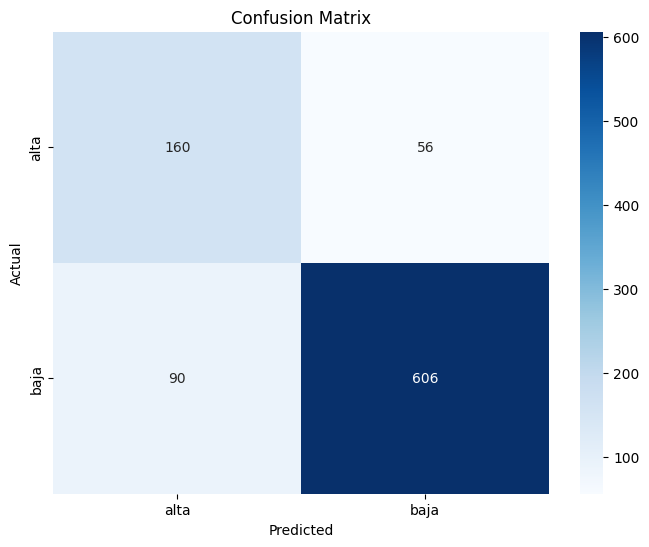

In [37]:
# Creamos un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['alta', 'baja'], yticklabels=['alta', 'baja'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión nos permite realizar una primera aproximación al análisis del rendimiento del modelo. En este caso, de la interpretación de la matriz de confusión obtenemos:  
- TP (True Positive): 160
- TN (True Negative): 606
- FP (False Positive): 90
- FN (False Negative): 56  

por lo que podemos conseguir los ratios a partir de esta información, ya que   
Tasa de verdaderos positivos (TPR o Sensibilidad): $\frac{TP}{(TP + FN)}$  

Tasa de verdaderos negativos (TNR o Especificidad): $\frac{TN}{(TN + FP)}$  

Tasa de falsos positivos (FPR): $\frac{FP}{(FP + TN)}$  

Tasa de falsos negativos (FNR): $\frac{FN}{(FN + TP)}$

y usando los valores:

TPR: $\frac{160}{(160 + 56)}$ ≈ 0.7407   

TNR: $\frac{606}{(606 + 90)}$ ≈ 0.8707  

FPR: $\frac{90}{(90 + 606)}$ ≈ 0.1293  

FNR: $\frac{56}{(56 + 160)}$ ≈ 0.2593  



donde:  
- TPR (True Positive Rate), también conocido como Sensibilidad o Recall, es la proporción de instancias positivas que se clasifican correctamente como positivas. En este caso, tenemos un TPR de 160, lo que significa que 160 instancias positivas se clasificaron correctamente como positivas.

- TNR (True Negative Rate), también conocido como Especificidad, es la proporción de instancias negativas que se clasifican correctamente como negativas. En este caso, tenemos un TNR de 606, lo que significa que 606 instancias negativas se clasificaron correctamente como negativas.

- FPR (False Positive Rate) es la proporción de instancias negativas que se clasifican incorrectamente como positivas. En este caso, tenemos un FPR de 90, lo que significa que 90 instancias negativas se clasificaron incorrectamente como positivas.

- FNR (False Negative Rate) es la proporción de instancias positivas que se clasifican incorrectamente como negativas. En este caso, tenemos un FNR de 56, lo que significa que 56 instancias positivas se clasificaron incorrectamente como negativas.

En resumen, este modelo tiene una buena capacidad para clasificar correctamente tanto las instancias positivas como las negativas, ya que tanto el TPR como el TNR son altos. Sin embargo, el modelo aún comete algunos errores al clasificar las instancias negativas como positivas (FPR) y las instancias positivas como negativas (FNR), aunque estos errores son menos frecuentes en comparación con las clasificaciones correctas.


#### Curva precision-recall y curva ROC

In [38]:
from sklearn.preprocessing import LabelEncoder

# Inicializar y ajustar el codificador de etiquetas para poder calcular las métricas
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.fit_transform(y_pred)

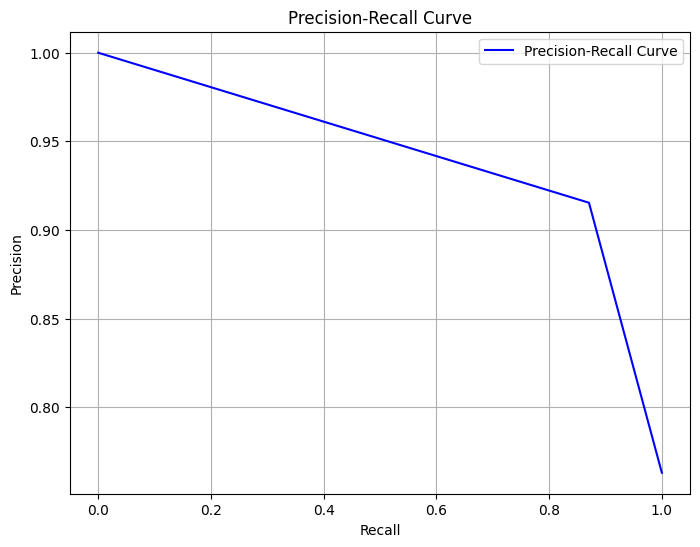

In [39]:
from sklearn.metrics import precision_recall_curve, roc_curve

# Calcular las curvas de precisión-recall y ROC
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_encoded)
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)

# Plotear la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


La curva de precisión-recall es una herramienta útil para evaluar el rendimiento de un modelo de clasificación binaria en un conjunto de datos desbalanceado. Muestra cómo varían la precisión y el recall para diferentes valores de umbral de clasificación. Cada punto en la curva representa un umbral de clasificación diferente. Idealmente, quieres que la curva esté lo más cerca posible del vértice superior derecho del gráfico, lo que indica una alta precisión y un alto recall simultáneamente.   
La métrica de área bajo la curva de precisión-recall (AUC-PR) cuantifica el rendimiento general del modelo. Cuanto mayor sea el área bajo la curva, mejor será el rendimiento del modelo. Un valor de AUC-PR cercano a 1 indica un modelo con alta precisión y alto recall en general.

In [40]:
from sklearn.metrics import auc

# Calcular el área bajo la curva de precisión-recall (AUC-PR)
auc_pr = auc(recall, precision)

print("Area bajo la curva de precisión-recall (AUC-PR):", auc_pr)

Area bajo la curva de precisión-recall (AUC-PR): 0.942390860341812


Por lo que podemos expresar que este modelo en general es alto en recall y en precisión.

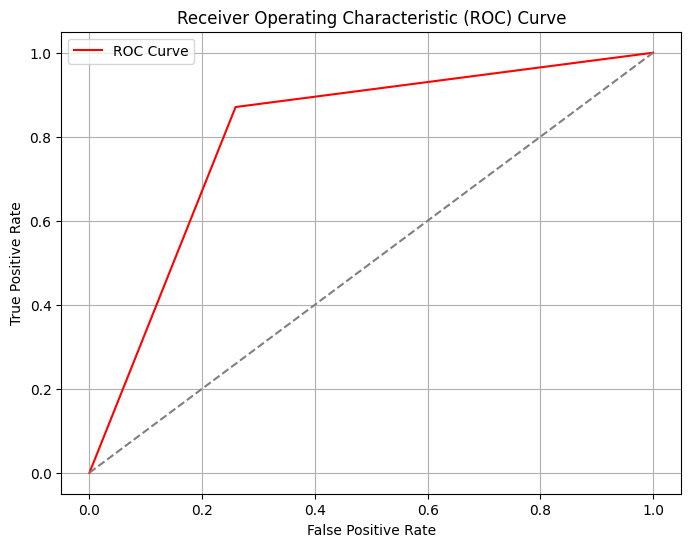

In [41]:
# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

En la curva ROC:
- El eje x representa la tasa de falsos positivos (FPR), de manera que cuanto menor sea el FPR, mejor será el modelo en términos de especificidad.  
- El eje y representa la tasa de verdaderos positivos (TPR), de manera que cuanto mayor sea el TPR, mejor será el modelo en términos de sensibilidad.  

Dado que TPR = 0.7407 y FPR = 0.1293, se puede interpretar que el modelo tiene una capacidad razonable para clasificar correctamente tanto las instancias positivas como las negativas, aunque puede haber margen de mejora. Una curva ROC ideal se acercaría al punto (0, 1), lo que indicaría un TPR de 1 y un FPR de 0, lo que significa que el modelo clasifica todas las instancias positivas correctamente y no clasifica ninguna instancia negativa incorrectamente como positiva.  

Podemos concluir que además, el modelo es mejor clasificando instancias negativas que positivas, puesto que TNR > TPR. Esto es lógico en el caso de que se esté tomando como negativo valores bajos de energía, puesto que se tiene mayor cantidad de instancias de esta clase.